In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Configuration du style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 10

# Chargement des données
data_folder = Path('data')
dim_client = pd.read_excel(data_folder / 'Dim_Client.xlsx')
dim_employe = pd.read_excel(data_folder / 'Dim_Employe.xlsx')
dim_temps = pd.read_excel(data_folder / 'Dim_Temps.xlsx')
table_fait = pd.read_excel(data_folder / 'Table_fait.xlsx')

# Fusion des données
df = table_fait.merge(dim_employe, on='id_seqEmployee', how='left')
df = df.merge(dim_client, on='id_seqClient', how='left')
df = df.merge(dim_temps, on='id_temps', how='left')


                   SECTION 1: ANALYSES PAR EMPLOYÉ                    


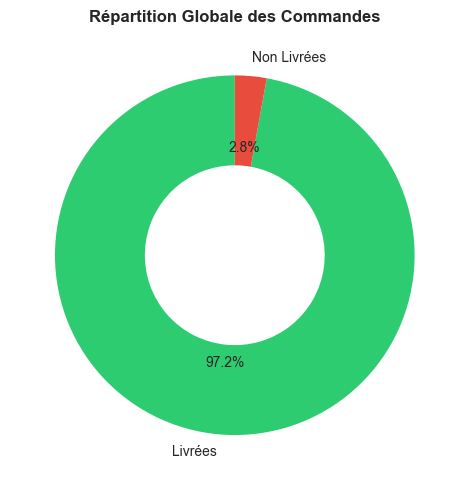

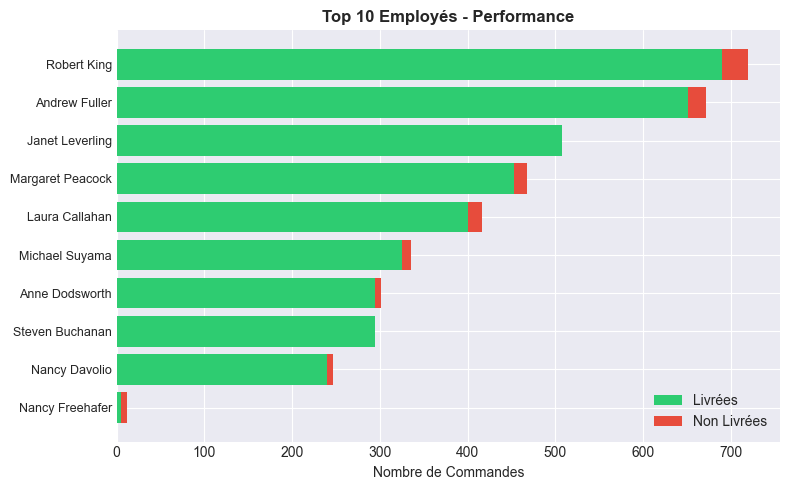

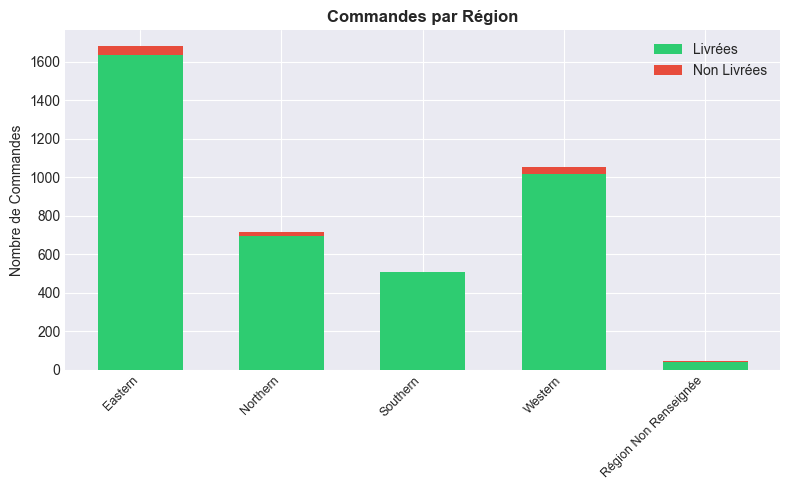

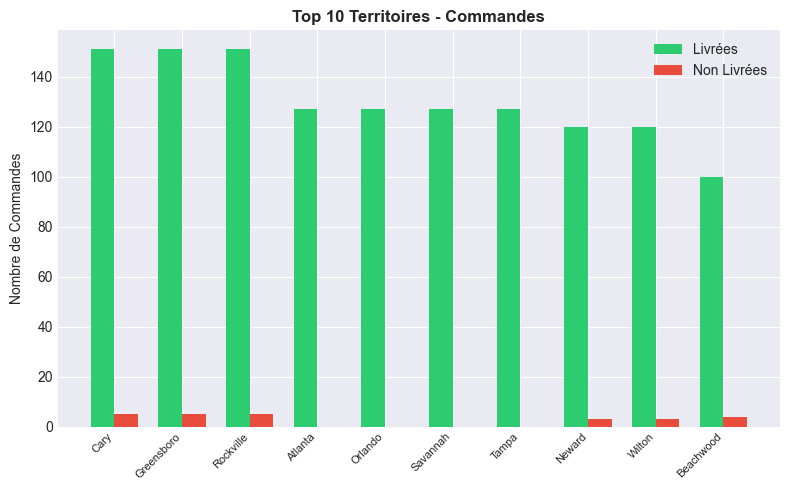

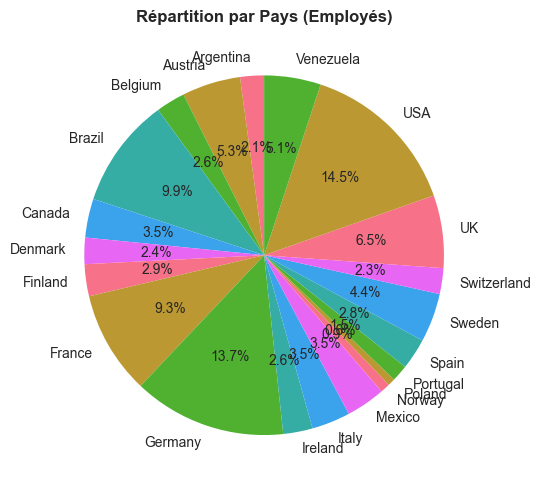

In [2]:
# ============================================================================
# SECTION 1: ANALYSES PAR EMPLOYÉ
# ============================================================================

print("\n" + "="*70)
print("SECTION 1: ANALYSES PAR EMPLOYÉ".center(70))
print("="*70)

# 1.1 Commandes par nombre d'employés (Donut Chart)
fig, ax1 = plt.subplots(figsize=(8, 5))
emp_data = df.groupby('id_seqEmployee').agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).sum()
colors = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = ax1.pie([emp_data['nbr_commandes_livrees'], emp_data['nbr_commandes_non_livrees']], 
                                     labels=['Livrées', 'Non Livrées'],
                                     autopct='%1.1f%%', startangle=90, colors=colors,
                                     wedgeprops=dict(width=0.5))
ax1.set_title('Répartition Globale des Commandes', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

# 1.2 Top 10 Employés par commandes (Barres horizontales)
fig, ax2 = plt.subplots(figsize=(8, 5))

# Créer d'abord le nom complet
df_temp = df.copy()
df_temp['nom_complet'] = df_temp['Prenom'] + ' ' + df_temp['Nom']

# Grouper par nom complet pour éviter les doublons
emp_perf = df_temp.groupby('nom_complet', as_index=False).agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
})

emp_perf['total'] = emp_perf['nbr_commandes_livrees'] + emp_perf['nbr_commandes_non_livrees']
emp_perf = emp_perf.sort_values(by='total', ascending=False).reset_index(drop=True)

top_emp = emp_perf.head(10)

y_pos = np.arange(len(top_emp))
ax2.barh(y_pos, top_emp['nbr_commandes_livrees'], label='Livrées', color='#2ecc71')
ax2.barh(y_pos, top_emp['nbr_commandes_non_livrees'], 
         left=top_emp['nbr_commandes_livrees'],
         label='Non Livrées', color='#e74c3c')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(top_emp['nom_complet'], fontsize=9)
ax2.set_xlabel('Nombre de Commandes')
ax2.set_title('Top 10 Employés - Performance', fontweight='bold', fontsize=12)
ax2.legend()
ax2.invert_yaxis()
plt.tight_layout()
plt.show()
# 1.3 Commandes par Région (Stacked Bar)
fig, ax3 = plt.subplots(figsize=(8, 5))
region_data = (
    df.groupby('Region', dropna=False)
      .agg({
          'nbr_commandes_livrees': 'sum',
          'nbr_commandes_non_livrees': 'sum'
      })
      .reset_index()
)

region_data['Region'] = region_data['Region'].fillna('Région Non Renseignée')

x = np.arange(len(region_data))
width = 0.6
ax3.bar(x, region_data['nbr_commandes_livrees'], width, label='Livrées', color='#2ecc71')
ax3.bar(x, region_data['nbr_commandes_non_livrees'], width, 
        bottom=region_data['nbr_commandes_livrees'], label='Non Livrées', color='#e74c3c')
ax3.set_xticks(x)
ax3.set_xticklabels(region_data['Region'], rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Nombre de Commandes')
ax3.set_title('Commandes par Région', fontweight='bold', fontsize=12)
ax3.legend()
plt.tight_layout()
plt.show()

# 1.4 Commandes par Territoire (TerritoryDescr) - Top 10
fig, ax4 = plt.subplots(figsize=(8, 5))
territory_data = df.groupby('TerritoryDescr').agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
territory_data['total'] = territory_data['nbr_commandes_livrees'] + territory_data['nbr_commandes_non_livrees']
top_territories = territory_data.nlargest(10, 'total')
x = np.arange(len(top_territories))
width = 0.35
ax4.bar(x - width/2, top_territories['nbr_commandes_livrees'], width, label='Livrées', color='#2ecc71')
ax4.bar(x + width/2, top_territories['nbr_commandes_non_livrees'], width, label='Non Livrées', color='#e74c3c')
ax4.set_xticks(x)
ax4.set_xticklabels(top_territories['TerritoryDescr'], rotation=45, ha='right', fontsize=8)
ax4.set_ylabel('Nombre de Commandes')
ax4.set_title('Top 10 Territoires - Commandes', fontweight='bold', fontsize=12)
ax4.legend()
plt.tight_layout()
plt.show()

# 1.5 Commandes par Pays des Employés (Pie Chart)
fig, ax5 = plt.subplots(figsize=(8, 5))
country_emp = df.groupby('Country_y').agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
country_emp['total'] = country_emp['nbr_commandes_livrees'] + country_emp['nbr_commandes_non_livrees']
ax5.pie(country_emp['total'], labels=country_emp['Country_y'], autopct='%1.1f%%', startangle=90)
ax5.set_title('Répartition par Pays (Employés)', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()



                    SECTION 2: ANALYSES PAR CLIENT                    


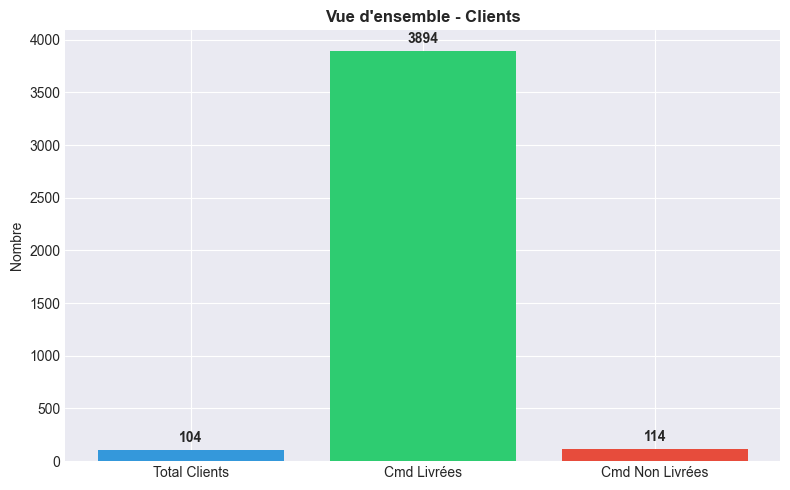

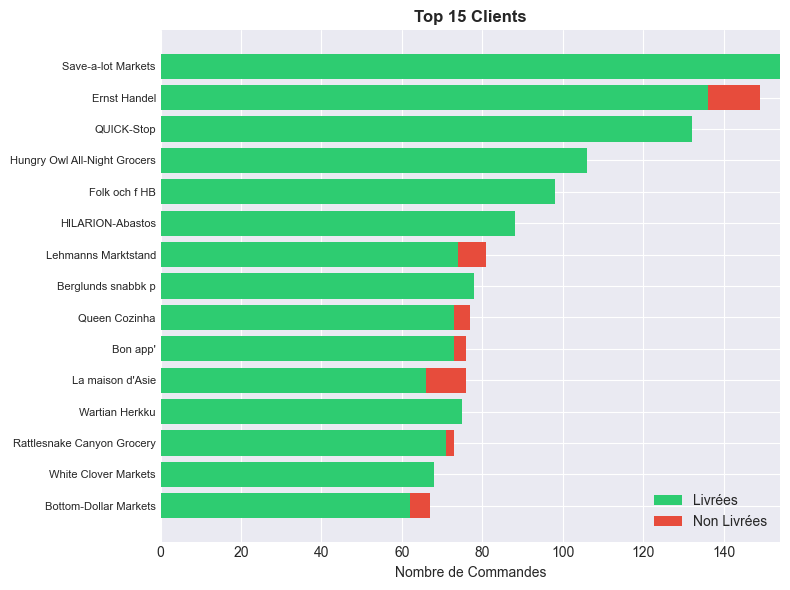

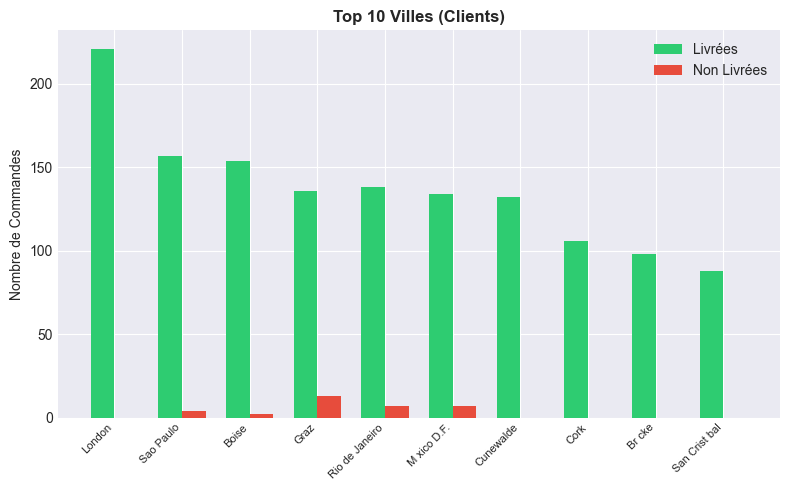

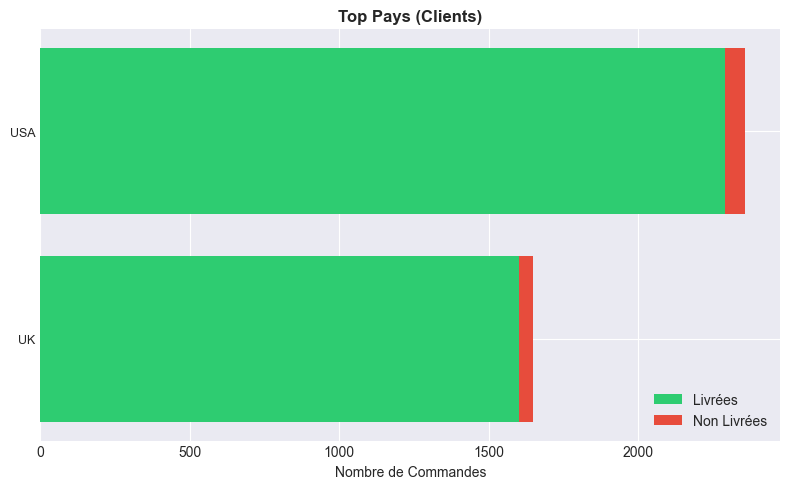

In [3]:
# ============================================================================
# SECTION 2: ANALYSES PAR CLIENT
# ============================================================================

print("\n" + "="*70)
print("SECTION 2: ANALYSES PAR CLIENT".center(70))
print("="*70)

# 2.1 Total Clients actifs vs Commandes
fig, ax6 = plt.subplots(figsize=(8, 5))
client_stats = df.groupby('id_seqClient').agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
categories = ['Total Clients', 'Cmd Livrées', 'Cmd Non Livrées']
values = [len(client_stats), client_stats['nbr_commandes_livrees'].sum(), 
          client_stats['nbr_commandes_non_livrees'].sum()]
colors_bar = ['#3498db', '#2ecc71', '#e74c3c']
ax6.bar(categories, values, color=colors_bar)
ax6.set_ylabel('Nombre')
ax6.set_title('Vue d\'ensemble - Clients', fontweight='bold', fontsize=12)
for i, v in enumerate(values):
    ax6.text(i, v + max(values)*0.02, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# 2.2 Top 15 Clients (Barres empilées horizontales)
fig, ax7 = plt.subplots(figsize=(8, 6))
client_perf = df.groupby(['id_seqClient', 'CompanyName']).agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
client_perf['total'] = client_perf['nbr_commandes_livrees'] + client_perf['nbr_commandes_non_livrees']
top_clients = client_perf.nlargest(15, 'total')
y_pos = np.arange(len(top_clients))
ax7.barh(y_pos, top_clients['nbr_commandes_livrees'], label='Livrées', color='#2ecc71')
ax7.barh(y_pos, top_clients['nbr_commandes_non_livrees'], left=top_clients['nbr_commandes_livrees'],
         label='Non Livrées', color='#e74c3c')
ax7.set_yticks(y_pos)
ax7.set_yticklabels(top_clients['CompanyName'], fontsize=8)
ax7.set_xlabel('Nombre de Commandes')
ax7.set_title('Top 15 Clients', fontweight='bold', fontsize=12)
ax7.legend()
ax7.invert_yaxis()
plt.tight_layout()
plt.show()

# 2.3 Commandes par Ville des Clients - Top 10
fig, ax8 = plt.subplots(figsize=(8, 5))
city_data = df.groupby('City').agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
city_data['total'] = city_data['nbr_commandes_livrees'] + city_data['nbr_commandes_non_livrees']
top_cities = city_data.nlargest(10, 'total')
x = np.arange(len(top_cities))
width = 0.35
ax8.bar(x - width/2, top_cities['nbr_commandes_livrees'], width, label='Livrées', color='#2ecc71')
ax8.bar(x + width/2, top_cities['nbr_commandes_non_livrees'], width, label='Non Livrées', color='#e74c3c')
ax8.set_xticks(x)
ax8.set_xticklabels(top_cities['City'], rotation=45, ha='right', fontsize=8)
ax8.set_ylabel('Nombre de Commandes')
ax8.set_title('Top 10 Villes (Clients)', fontweight='bold', fontsize=12)
ax8.legend()
plt.tight_layout()
plt.show()

# 2.4 Commandes par Pays des Clients
fig, ax9 = plt.subplots(figsize=(8, 5))
country_client = df.groupby('Country_x').agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
country_client['total'] = country_client['nbr_commandes_livrees'] + country_client['nbr_commandes_non_livrees']
country_client = country_client.sort_values('total', ascending=True).tail(10)
y_pos = np.arange(len(country_client))
ax9.barh(y_pos, country_client['nbr_commandes_livrees'], label='Livrées', color='#2ecc71')
ax9.barh(y_pos, country_client['nbr_commandes_non_livrees'], left=country_client['nbr_commandes_livrees'],
         label='Non Livrées', color='#e74c3c')
ax9.set_yticks(y_pos)
ax9.set_yticklabels(country_client['Country_x'], fontsize=9)
ax9.set_xlabel('Nombre de Commandes')
ax9.set_title('Top Pays (Clients)', fontweight='bold', fontsize=12)
ax9.legend()
plt.tight_layout()
plt.show()



                   SECTION 3: ANALYSES TEMPORELLES                    


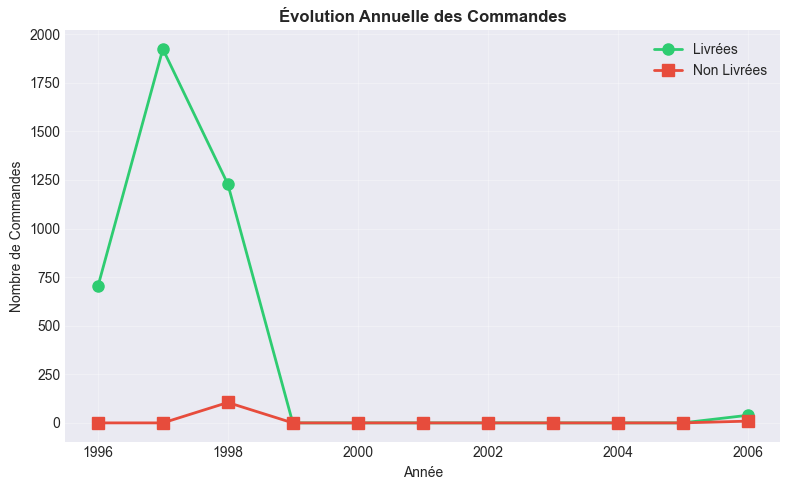

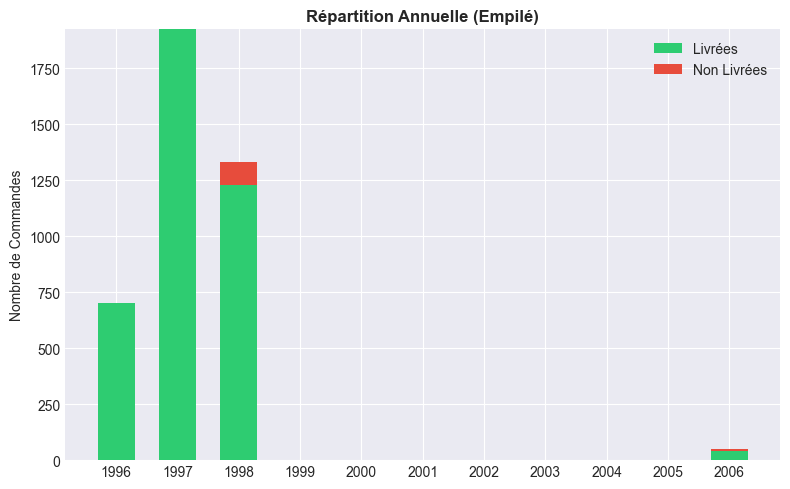

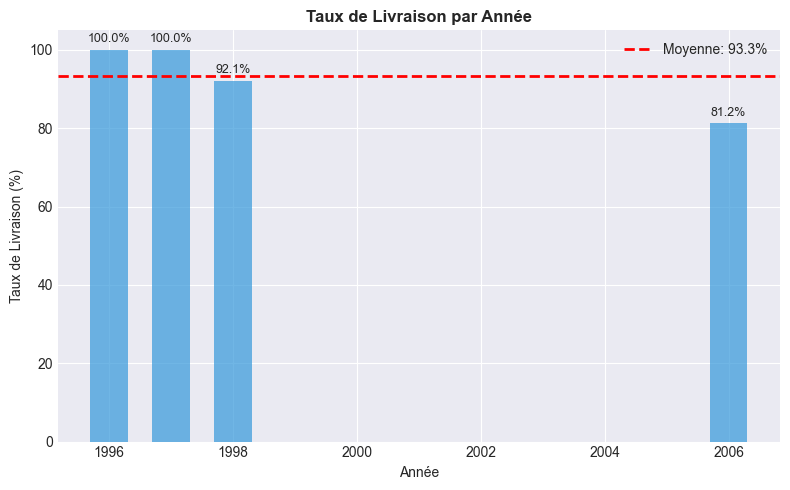

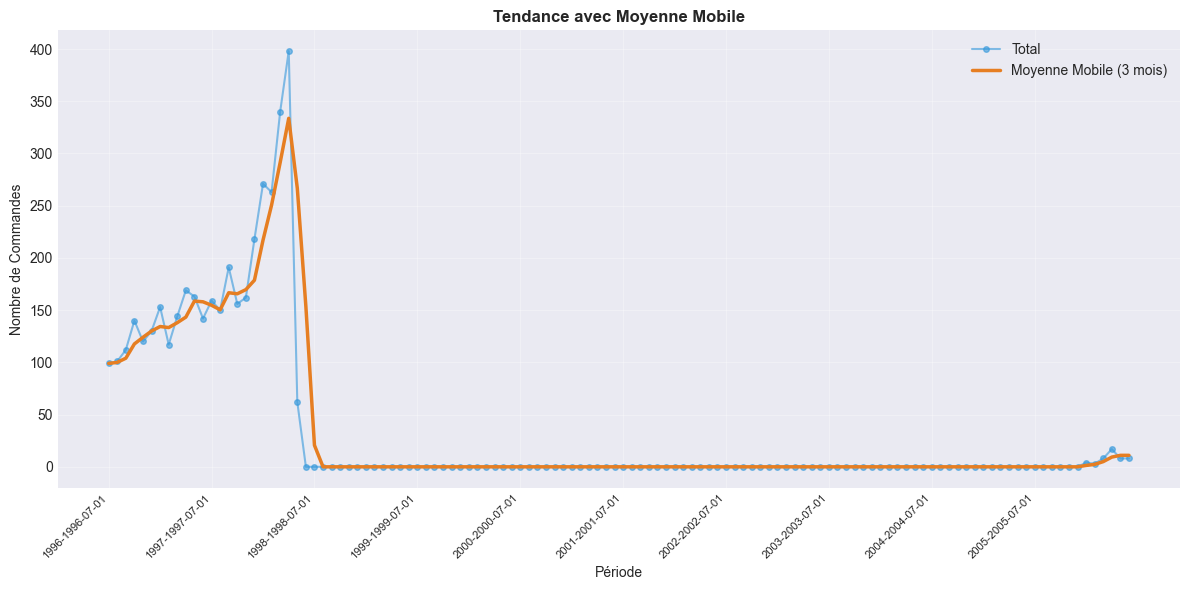

In [4]:
# ============================================================================
# SECTION 3: ANALYSES TEMPORELLES
# ============================================================================

print("\n" + "="*70)
print("SECTION 3: ANALYSES TEMPORELLES".center(70))
print("="*70)

# 3.1 Évolution par Année (Line Chart)
fig, ax10 = plt.subplots(figsize=(8, 5))
year_data = df.groupby('annee').agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
ax10.plot(year_data['annee'], year_data['nbr_commandes_livrees'], marker='o', 
          linewidth=2, markersize=8, label='Livrées', color='#2ecc71')
ax10.plot(year_data['annee'], year_data['nbr_commandes_non_livrees'], marker='s', 
          linewidth=2, markersize=8, label='Non Livrées', color='#e74c3c')
ax10.set_xlabel('Année')
ax10.set_ylabel('Nombre de Commandes')
ax10.set_title('Évolution Annuelle des Commandes', fontweight='bold', fontsize=12)
ax10.legend()
ax10.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.2 Commandes par Année (Stacked Bar)
fig, ax11 = plt.subplots(figsize=(8, 5))
x = np.arange(len(year_data))
width = 0.6
ax11.bar(x, year_data['nbr_commandes_livrees'], width, label='Livrées', color='#2ecc71')
ax11.bar(x, year_data['nbr_commandes_non_livrees'], width, 
         bottom=year_data['nbr_commandes_livrees'], label='Non Livrées', color='#e74c3c')
ax11.set_xticks(x)
ax11.set_xticklabels(year_data['annee'])
ax11.set_ylabel('Nombre de Commandes')
ax11.set_title('Répartition Annuelle (Empilé)', fontweight='bold', fontsize=12)
ax11.legend()
plt.tight_layout()
plt.show()

# 3.3 Taux de Livraison par Année
fig, ax12 = plt.subplots(figsize=(8, 5))
year_data['taux_livraison'] = (year_data['nbr_commandes_livrees'] / 
                                (year_data['nbr_commandes_livrees'] + year_data['nbr_commandes_non_livrees'])) * 100
ax12.bar(year_data['annee'], year_data['taux_livraison'], color='#3498db', alpha=0.7, width=0.6)
ax12.axhline(y=year_data['taux_livraison'].mean(), color='r', linestyle='--', 
             linewidth=2, label=f'Moyenne: {year_data["taux_livraison"].mean():.1f}%')
ax12.set_xlabel('Année')
ax12.set_ylabel('Taux de Livraison (%)')
ax12.set_title('Taux de Livraison par Année', fontweight='bold', fontsize=12)
ax12.legend()
ax12.set_ylim(0, 105)
for i, (year, rate) in enumerate(zip(year_data['annee'], year_data['taux_livraison'])):
    ax12.text(year, rate + 2, f'{rate:.1f}%', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# 3.4 Tendance avec Moyennes Mobiles
fig, ax15 = plt.subplots(figsize=(12, 6))
monthly_trend = df.groupby(['annee', 'mois_annee']).agg({
    'nbr_commandes_livrees': 'sum',
    'nbr_commandes_non_livrees': 'sum'
}).reset_index()
monthly_trend['total'] = monthly_trend['nbr_commandes_livrees'] + monthly_trend['nbr_commandes_non_livrees']
monthly_trend['periode'] = monthly_trend['annee'].astype(str) + '-' + monthly_trend['mois_annee'].astype(str).str.zfill(2)
monthly_trend = monthly_trend.sort_values(['annee', 'mois_annee'])
monthly_trend['moyenne_mobile'] = monthly_trend['total'].rolling(window=3, min_periods=1).mean()

ax15.plot(range(len(monthly_trend)), monthly_trend['total'], marker='o', 
          linewidth=1.5, markersize=4, label='Total', color='#3498db', alpha=0.6)
ax15.plot(range(len(monthly_trend)), monthly_trend['moyenne_mobile'], 
          linewidth=2.5, label='Moyenne Mobile (3 mois)', color='#e67e22')
ax15.set_xlabel('Période')
ax15.set_ylabel('Nombre de Commandes')
ax15.set_title('Tendance avec Moyenne Mobile', fontweight='bold', fontsize=12)
ax15.legend()
ax15.grid(True, alpha=0.3)
# Afficher quelques labels de période
step = max(1, len(monthly_trend) // 10)
ax15.set_xticks(range(0, len(monthly_trend), step))
ax15.set_xticklabels(monthly_trend['periode'].iloc[::step], rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

In [5]:
# ============================================================================
# STATISTIQUES RÉCAPITULATIVES
# ============================================================================

print("="*70)
print("STATISTIQUES RÉCAPITULATIVES".center(70))
print("="*70)

total_livrees = df['nbr_commandes_livrees'].sum()
total_non_livrees = df['nbr_commandes_non_livrees'].sum()
total_commandes = total_livrees + total_non_livrees
taux_livraison_global = (total_livrees / total_commandes) * 100

print(f"\n📊 COMMANDES GLOBALES:")
print(f"   • Total commandes: {total_commandes:,}")
print(f"   • Commandes livrées: {total_livrees:,} ({taux_livraison_global:.2f}%)")
print(f"   • Commandes non livrées: {total_non_livrees:,} ({100-taux_livraison_global:.2f}%)")

print(f"\n👥 EMPLOYÉS:")
print(f"   • Nombre total d'employés: {df['id_seqEmployee'].nunique()}")
print(f"   • Nombre de régions: {df['Region'].nunique()}")
print(f"   • Nombre de territoires: {df['TerritoryDescr'].nunique()}")

print(f"\n🏢 CLIENTS:")
print(f"   • Nombre total de clients: {df['id_seqClient'].nunique()}")
print(f"   • Nombre de villes: {df['City'].nunique()}")
print(f"   • Nombre de pays: {df['Country_x'].nunique()}")

print(f"\n📅 PÉRIODE:")
print(f"   • Années couvertes: {df['annee'].min()} - {df['annee'].max()}")
print(f"   • Nombre total de mois: {len(df.groupby(['annee', 'mois_annee']))}")

print("\n" + "="*70)

                     STATISTIQUES RÉCAPITULATIVES                     

📊 COMMANDES GLOBALES:
   • Total commandes: 4,008
   • Commandes livrées: 3,894 (97.16%)
   • Commandes non livrées: 114 (2.84%)

👥 EMPLOYÉS:
   • Nombre total d'employés: 57
   • Nombre de régions: 4
   • Nombre de territoires: 49

🏢 CLIENTS:
   • Nombre total de clients: 104
   • Nombre de villes: 78
   • Nombre de pays: 2

📅 PÉRIODE:
   • Années couvertes: 1996 - 2006
   • Nombre total de mois: 120

